In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


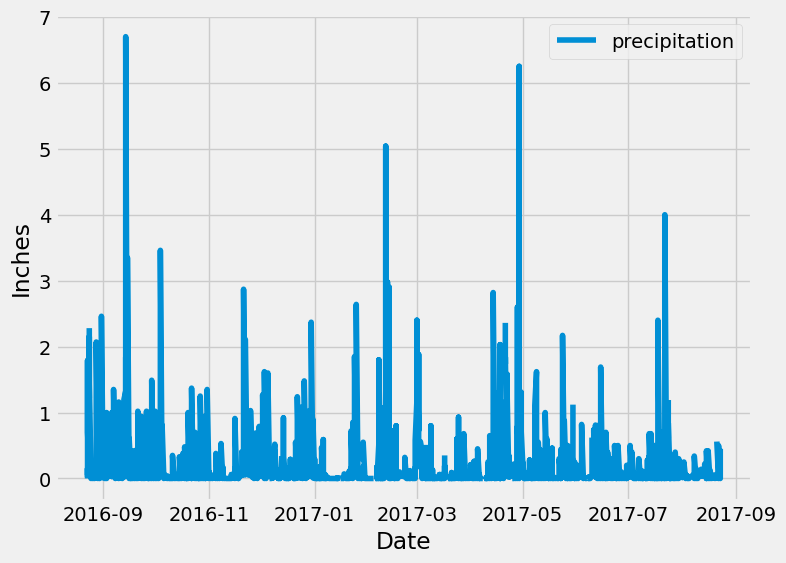

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
date_one = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
one_year = session.query(measurement.date, measurement.prcp).order_by(measurement.date).filter(measurement.date >= date_one).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df = pd.DataFrame(one_year, columns=['date', 'precipitation'])
results_df['date'] = pd.to_datetime(results_df['date'])
# Sort the dataframe by date
results_df.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(8, 6))
plt.plot(results_df.index, results_df['precipitation'], label='Precipitation')
plt.legend(["precipitation"],loc='upper right')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number of stations in the dataset
station_count_query = session.query(func.count(station.station)).first()
station_count = station_count_query[0]
station_count

9

In [29]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts_query = session.query(
    measurement.station, 
    func.count(measurement.station)
).group_by(measurement.station).order_by(func.count(measurement.station).desc())
station_counts = station_counts_query.all()
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

Answer the following question: which station id has the greatest number of observations?

- ID USC00519281 the greatest number of observations.

In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_stats_query = session.query(
    func.min(measurement.tobs),
    func.max(measurement.tobs),
    func.avg(measurement.tobs)
).filter(measurement.station == 'USC00519281')
temperature_stats = temperature_stats_query.all()
temperature_stats

[(54.0, 85.0, 71.66378066378067)]

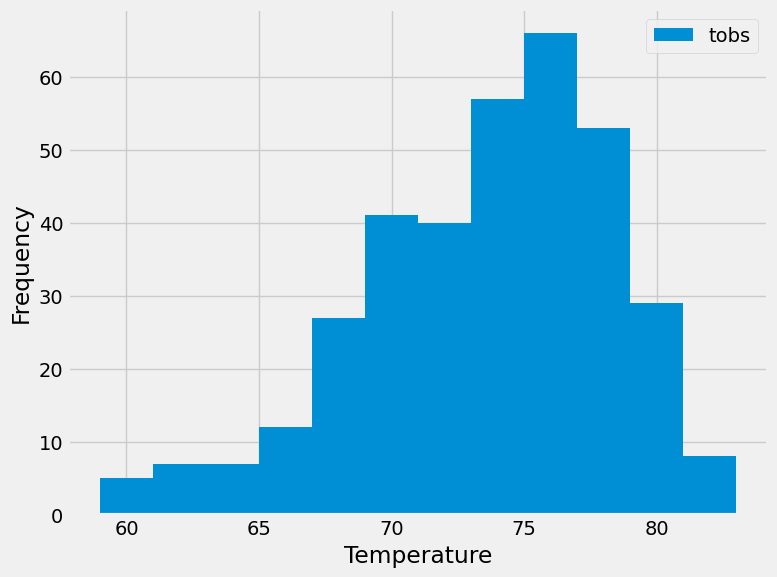

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_results_query = session.query(measurement.tobs).filter(
    measurement.station == 'USC00519281',
    measurement.date >= date_one
)

# Execute the query and retrieve all results
temperature_results = temperature_results_query.all()
temperature_df = pd.DataFrame(temperature_results, columns=['tobs'])
temperature_df.plot.hist(bins=12, figsize=(8, 6))
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Close Session

In [38]:
# Close Session
session.close()